# **Data Visualization and Pre-processing**

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualisations

**1. Univariate Analysis**

In [5]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

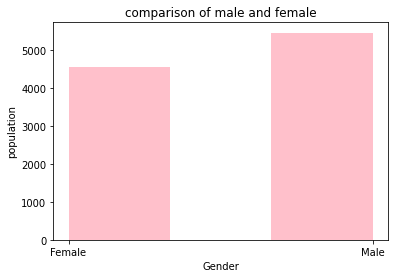

In [6]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [7]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

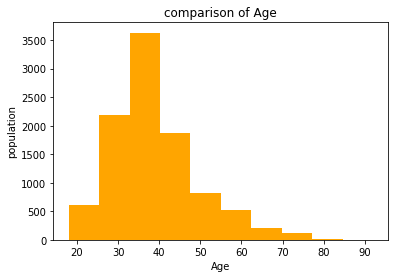

In [8]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [9]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

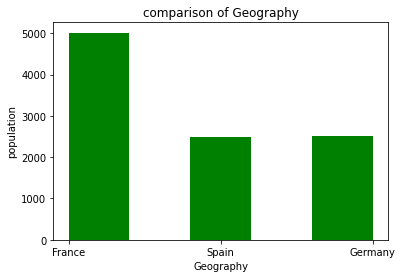

In [10]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [11]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

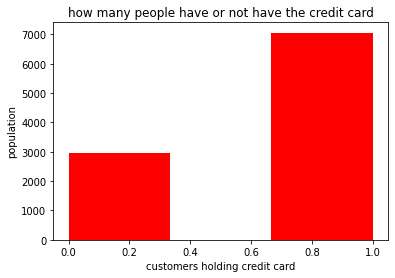

In [12]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [13]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

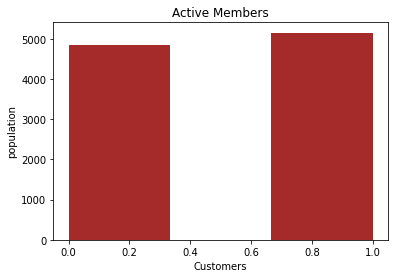

In [14]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

**2. Bi - Variate Analysis**

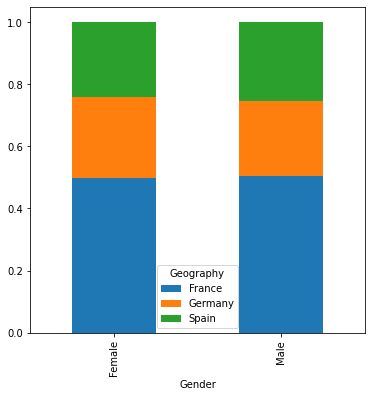

In [15]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

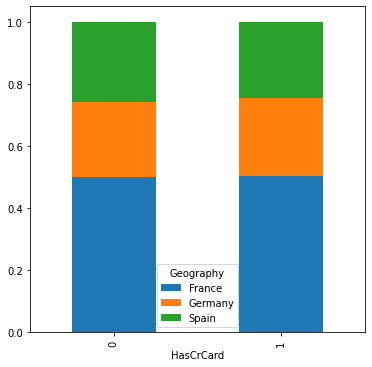

In [16]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

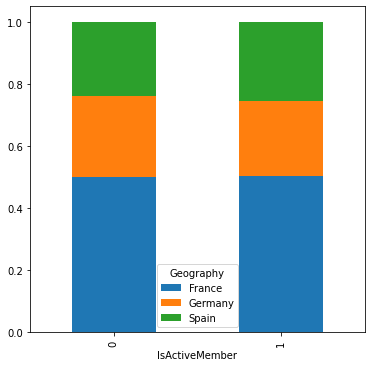

In [17]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

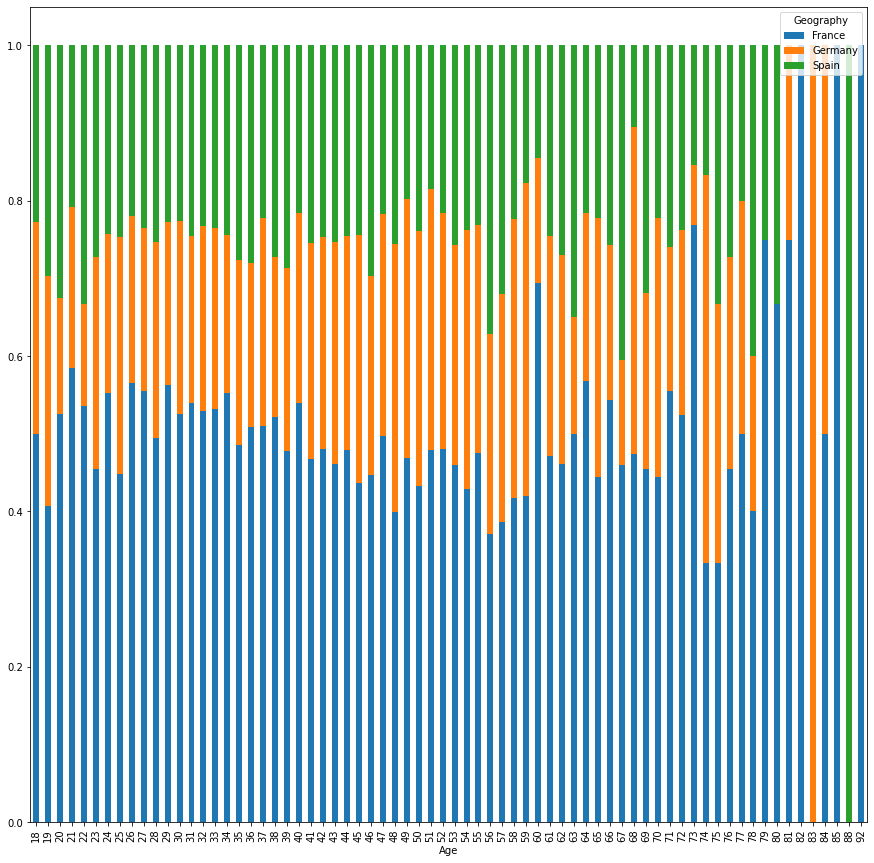

In [18]:
# comparing ages in different geographies

Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [20]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


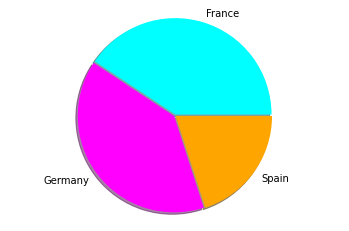

In [21]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

**3. Multi - Variate Analysis**

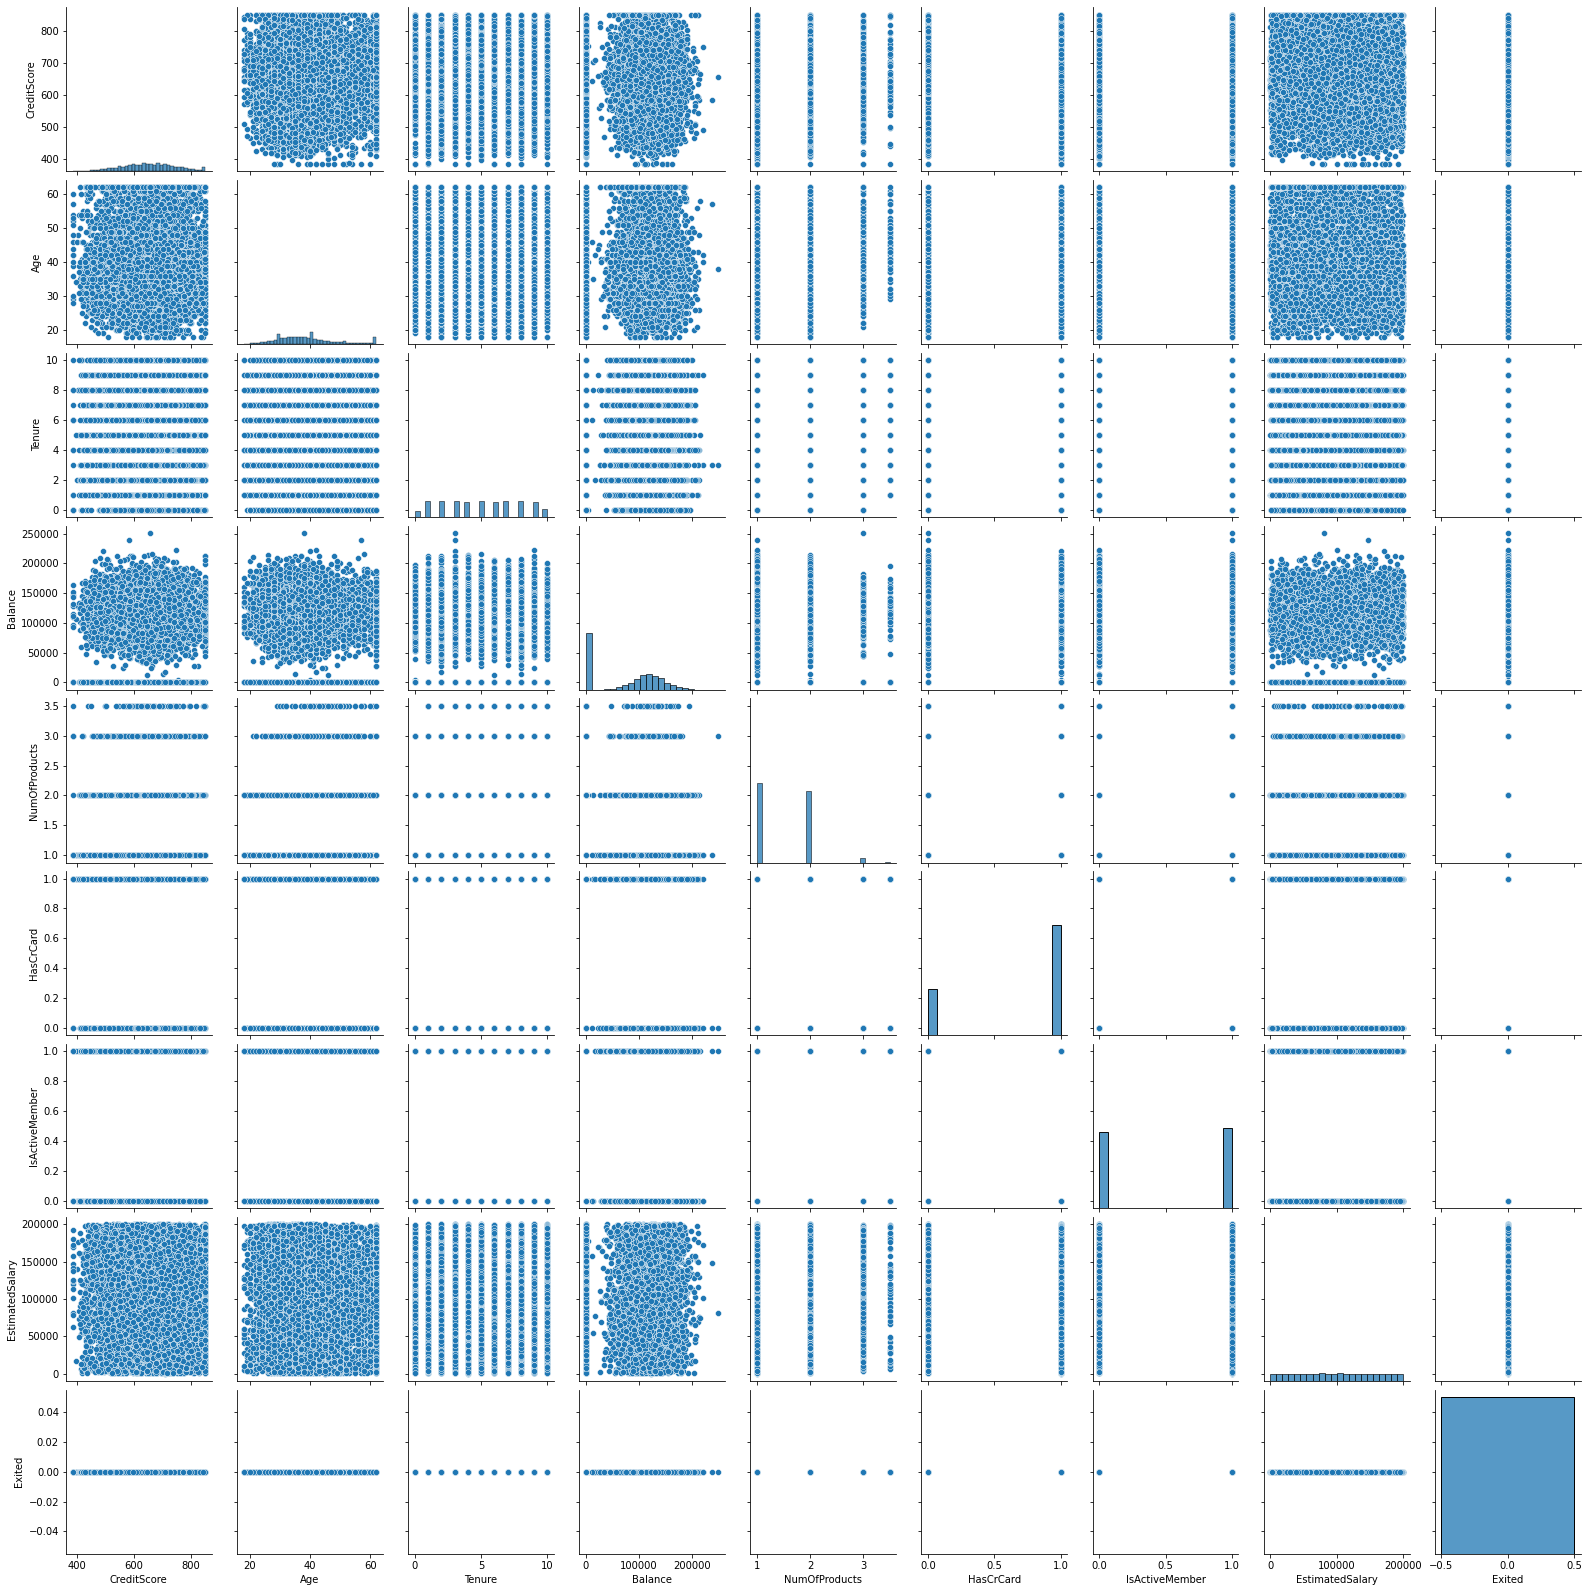

In [40]:
sns.pairplot(data)

# Descriptive statistics

In [26]:
#Statistical analysis
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handle the Missing values

In [27]:
#Missing Values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values are found.

# Find the outliers and replace the outliers

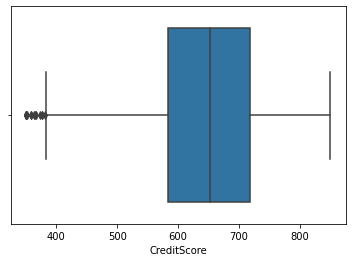

In [28]:
sns.boxplot(data = data, x = 'CreditScore')

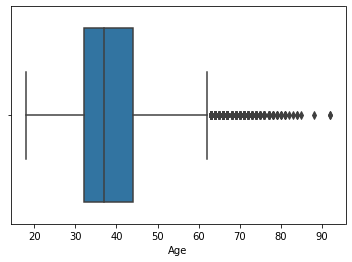

In [29]:
sns.boxplot(data = data, x = 'Age')

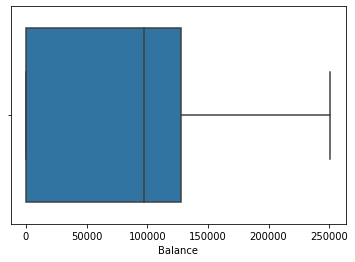

In [30]:
sns.boxplot(data = data, x = 'Balance')

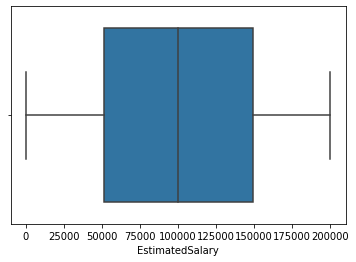

In [31]:
sns.boxplot(data = data, x = 'EstimatedSalary')

In [32]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

In [33]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0
mean,5000.50000,1.569094e+07,650.561300,38.660800,5.012800,76485.889288,1.527200,0.70550,0.515100,100090.239881,0.0
std,2886.89568,7.193619e+04,96.558702,9.746704,2.892174,62397.405202,0.570081,0.45584,0.499797,57510.492818,0.0
min,1.00000,1.556570e+07,383.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.0
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.0
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.0
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.0
max,10000.00000,1.581569e+07,850.000000,62.000000,10.000000,250898.090000,3.500000,1.00000,1.000000,199992.480000,0.0


# Preprocessing

In [34]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [35]:
data.shape

(10000, 11)

# Split the data into dependent and independent variables

In [36]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


# Check for Categorical columns and perform encoding

In [37]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0,0,1,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,1,1,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,1,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1,0,0,1,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,1,1,0


# Split the data into training and testing

In [38]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


# Scale the independent variables

In [39]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.736828,0.042283,0.008860,0.673160,2.583231,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.025257,-0.674496,0.008860,-1.207724,0.822578,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808861,-0.469702,1.393293,-0.356937,0.822578,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396677,-0.060114,0.008860,-0.009356,-0.938076,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.468908,1.373444,0.701077,-1.207724,0.822578,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743
